In [168]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import fastprop
import os
from rdkit import Chem

matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

In [169]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents", "highsol")
bigsol_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "bigsol_features_predictions.csv"))
bigsol_predictions[['solvent smiles', 'solute smiles']] = bigsol_predictions['smiles'].str.split('.', n=1, expand=True)
bigsol_predictions
solute_smiles = bigsol_predictions.pop('solute smiles')  
solvent_smiles = bigsol_predictions.pop('solvent smiles')  
both = bigsol_predictions.pop('smiles')  

bigsol_predictions.insert(0, 'solvent smiles', solvent_smiles) 
bigsol_predictions.insert(0, 'solute smiles', solute_smiles) 

In [170]:
grouped_predictions = bigsol_predictions.groupby(['solvent smiles', 'solute smiles'])

# Create a list of smaller dataframes
sub_dfs = [group for _, group in grouped_predictions]

Plotting Temperature trends for different solutions

Below, this demonstrates where the model gets slopes reasonable well, despite being a bit off on magnitude

In [171]:
sub_dfs[0]

,solute smiles,solvent smiles,logS_true,temperature,logS_pred,stdev
53976,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-1.039233,296.15,-1.313614,0.403165
53977,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.995854,301.15,-1.253141,0.404055
53978,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.917328,306.25,-1.191487,0.405080
53979,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.814857,311.05,-1.133476,0.406152
53980,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.663012,318.05,-1.048889,0.407899
53981,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.520895,325.15,-0.963084,0.409894
53982,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.446711,329.25,-0.913520,0.411149
53983,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.380949,332.55,-0.873615,0.412214
53984,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.271469,337.05,-0.819176,0.413747
53985,O=C(O)c1ccccc1,C1CCC2CCCCC2C1,-0.205406,338.65,-0.799813,0.414315


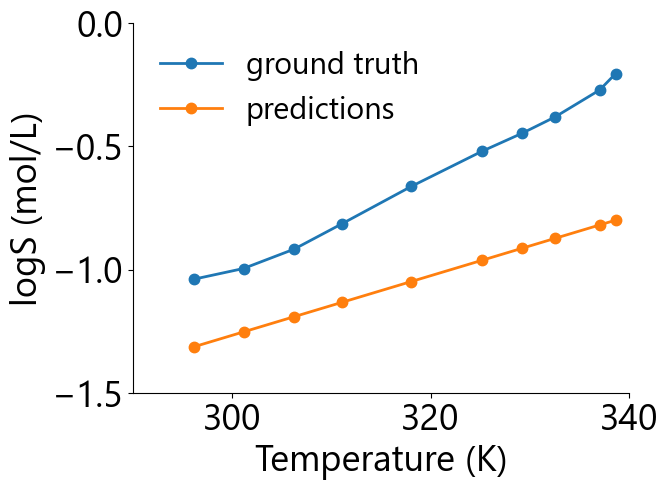

In [172]:
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[0]['temperature'],sub_dfs[0]['logS_true'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[0]['temperature'],sub_dfs[0]['logS_pred'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
ax1.set_ylim([-1.5, 0])
ax1.set_ylabel("logS (mol/L)")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

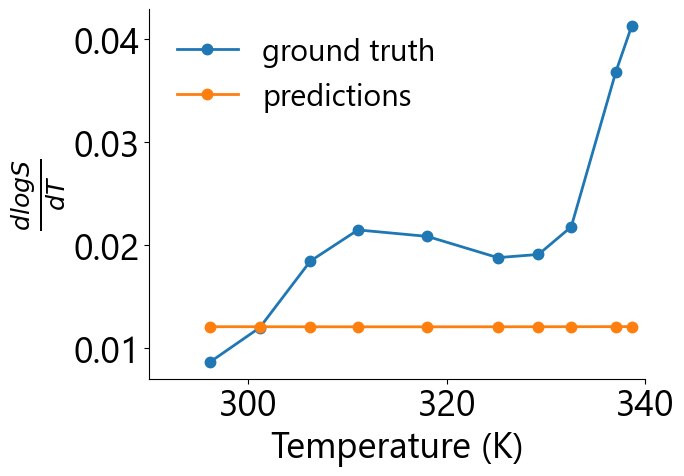

In [173]:
grads_true = np.gradient(sub_dfs[0]['logS_true'], sub_dfs[0]['temperature'])
grads_predicted = np.gradient(sub_dfs[0]['logS_pred'], sub_dfs[0]['temperature'])

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[0]['temperature'],grads_true, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[0]['temperature'],grads_predicted, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel(r"$\frac{dlogS}{dT}$")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

But here, the slope is a bit off, even though magnitudes are reasonable. 

In [174]:
sub_dfs[140]

,solute smiles,solvent smiles,logS_true,temperature,logS_pred,stdev
36019,O=C(O)c1cccc(C(=O)O)c1,C1CCOC1,-0.760507,293.35,-1.174616,0.261046
36020,O=C(O)c1cccc(C(=O)O)c1,C1CCOC1,-0.728306,303.15,-1.056067,0.274206
36021,O=C(O)c1cccc(C(=O)O)c1,C1CCOC1,-0.693035,313.45,-0.931566,0.288016
36022,O=C(O)c1cccc(C(=O)O)c1,C1CCOC1,-0.660013,322.85,-0.817965,0.300656
36023,O=C(O)c1cccc(C(=O)O)c1,C1CCOC1,-0.638967,328.75,-0.746645,0.308634


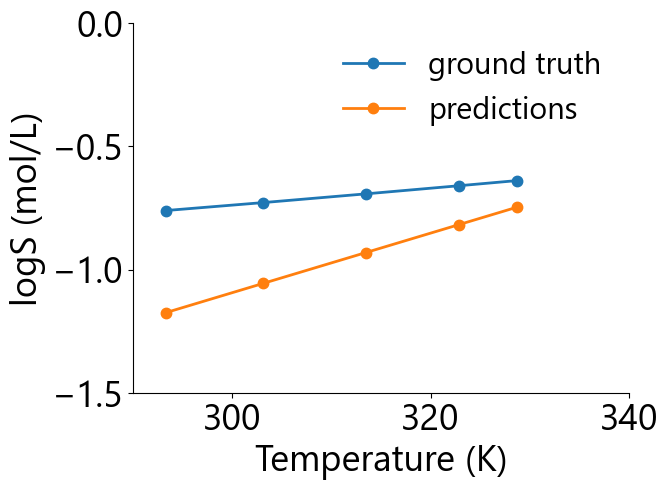

In [175]:
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[140]['temperature'],sub_dfs[140]['logS_true'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[140]['temperature'],sub_dfs[140]['logS_pred'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
ax1.set_ylim([-1.5, 0])
ax1.set_ylabel("logS (mol/L)")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

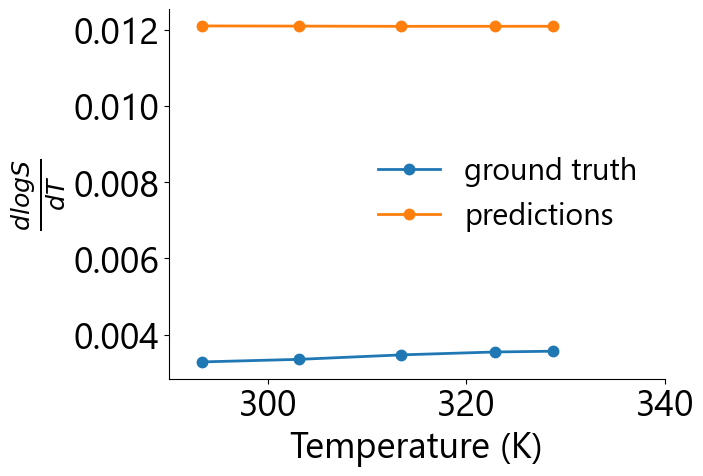

In [176]:
grads_true = np.gradient(sub_dfs[140]['logS_true'], sub_dfs[140]['temperature'])
grads_predicted = np.gradient(sub_dfs[140]['logS_pred'], sub_dfs[140]['temperature'])

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[140]['temperature'],grads_true, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[140]['temperature'],grads_predicted, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel(r"$\frac{dlogS}{dT}$")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

Here, the slope is spot on, but the magnitude is slightly offset.

In [177]:
sub_dfs[600]

,solute smiles,solvent smiles,logS_true,temperature,logS_pred,stdev
26408,S=c1[nH]c2ccccc2s1,CC#N,-1.078940,273.15,-0.896379,0.071459
26409,S=c1[nH]c2ccccc2s1,CC#N,-1.040364,275.65,-0.865764,0.070602
26410,S=c1[nH]c2ccccc2s1,CC#N,-1.006109,278.15,-0.835154,0.069935
26411,S=c1[nH]c2ccccc2s1,CC#N,-0.970151,280.65,-0.804549,0.069463
26412,S=c1[nH]c2ccccc2s1,CC#N,-0.938473,283.15,-0.773949,0.069187
26413,S=c1[nH]c2ccccc2s1,CC#N,-0.905169,285.65,-0.743354,0.069109
26414,S=c1[nH]c2ccccc2s1,CC#N,-0.868994,288.15,-0.712764,0.069225
26415,S=c1[nH]c2ccccc2s1,CC#N,-0.836513,290.65,-0.682178,0.069535
26416,S=c1[nH]c2ccccc2s1,CC#N,-0.806661,293.15,-0.651597,0.070033
26417,S=c1[nH]c2ccccc2s1,CC#N,-0.774883,295.65,-0.621020,0.070715


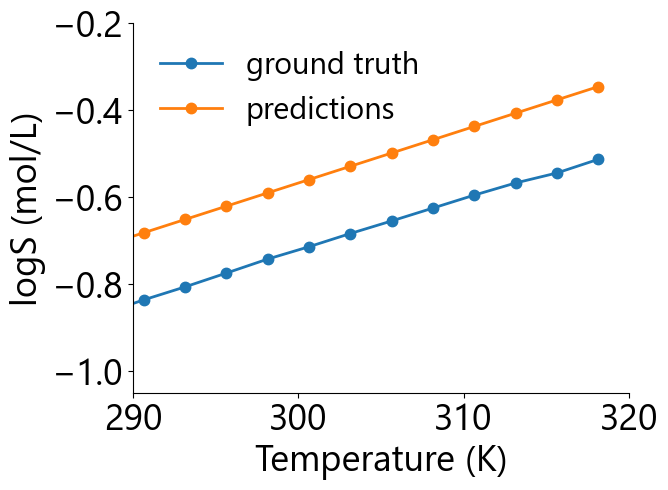

In [178]:
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[600]['temperature'],sub_dfs[600]['logS_true'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[600]['temperature'],sub_dfs[600]['logS_pred'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 320])
ax1.set_ylim([-1.05, -0.2])
ax1.set_ylabel("logS (mol/L)")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

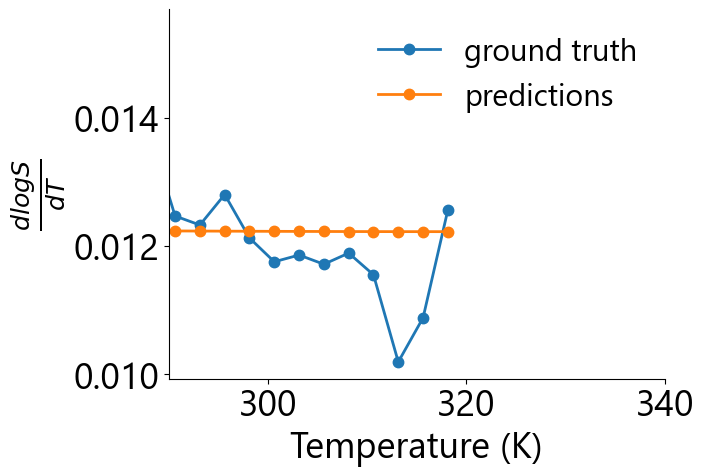

In [179]:
grads_true = np.gradient(sub_dfs[600]['logS_true'], sub_dfs[600]['temperature'])
grads_predicted = np.gradient(sub_dfs[600]['logS_pred'], sub_dfs[600]['temperature'])

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[600]['temperature'],grads_true, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[600]['temperature'],grads_predicted, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel(r"$\frac{dlogS}{dT}$")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

In [180]:
sub_dfs[3500]

,solute smiles,solvent smiles,logS_true,temperature,logS_pred,stdev
4533,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-2.840037,278.15,-2.968792,0.430208
4534,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-2.654207,283.15,-2.907695,0.425252
4535,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-2.467071,288.15,-2.846621,0.420402
4536,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-2.284635,293.15,-2.785568,0.415657
4537,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-2.115231,298.15,-2.724535,0.411016
4538,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-1.938967,303.15,-2.663517,0.406475
4539,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-1.779384,308.15,-2.602511,0.402034
4540,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-1.616152,313.15,-2.541514,0.397688
4541,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-1.460152,318.15,-2.480521,0.393436
4542,O=C1CC[C@@H](C(=O)N2CSC[C@H]2C(=O)O)N1,CCO,-1.315671,323.15,-2.419529,0.389275


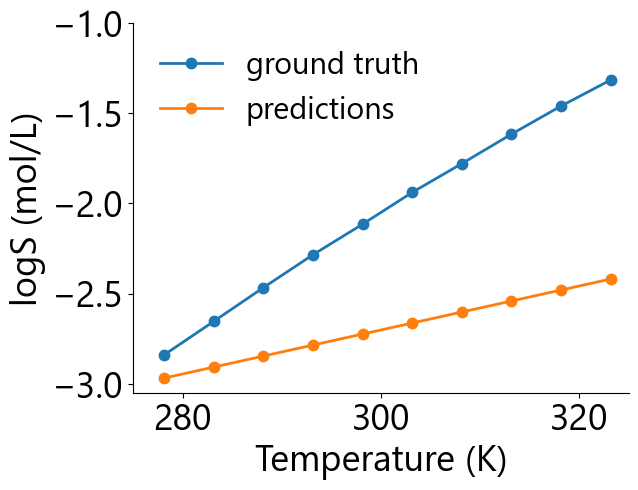

In [181]:
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[3500]['temperature'],sub_dfs[3500]['logS_true'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[3500]['temperature'],sub_dfs[3500]['logS_pred'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([275, 325])
ax1.set_ylim([-3.05, -1])
ax1.set_ylabel("logS (mol/L)")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

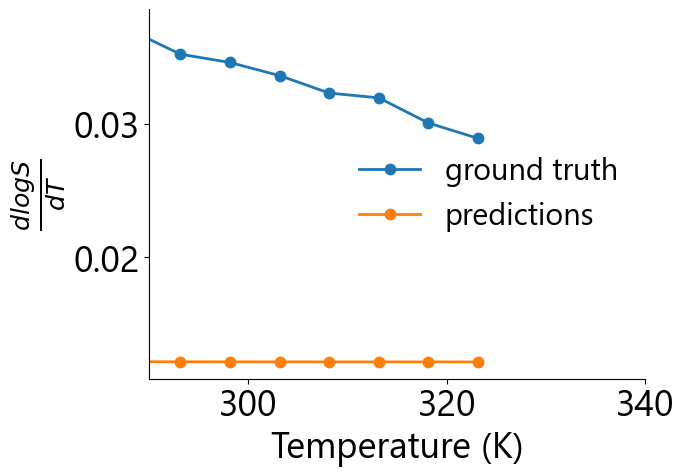

In [182]:
grads_true = np.gradient(sub_dfs[3500]['logS_true'], sub_dfs[3500]['temperature'])
grads_predicted = np.gradient(sub_dfs[3500]['logS_pred'], sub_dfs[3500]['temperature'])

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[3500]['temperature'],grads_true, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[3500]['temperature'],grads_predicted, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel(r"$\frac{dlogS}{dT}$")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

In [183]:
total_predicted_gradients = []
total_true_gradients = []
for df in sub_dfs:
    if(len(df) > 1):
        total_true_gradients.append(np.gradient(df['logS_true'], df['temperature']).flatten())
        total_predicted_gradients.append(np.gradient(df['logS_pred'], df['temperature']).flatten())



c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1239: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1247: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1256: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)

In [184]:
true_grads = np.concatenate(total_true_gradients).ravel()
pred_grads = np.concatenate(total_predicted_gradients).ravel()


In [185]:
true_grads = true_grads[~np.isnan(true_grads)]
true_grads[true_grads > 1e308] = 0

pred_grads = pred_grads[~np.isnan(pred_grads)]
pred_grads[pred_grads > 1e308] = 0
print(len(true_grads), len(pred_grads))

53964 53960


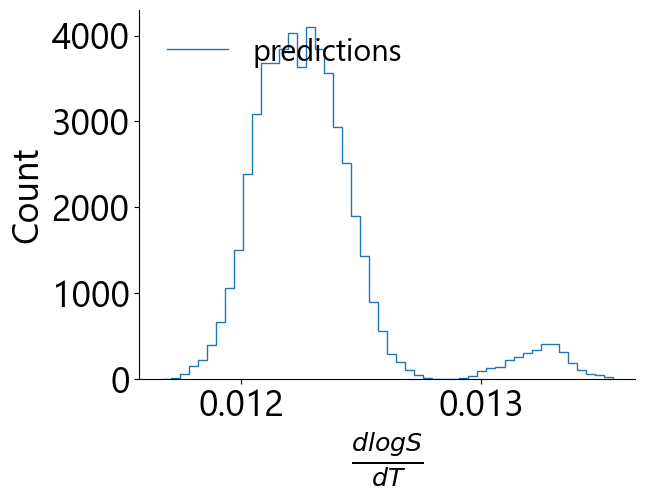

In [186]:
true_grads_binned, true_grad_bins = np.histogram(true_grads, bins = 50)
pred_grads_binned, pred_grad_bins = np.histogram(pred_grads, bins = 50)

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()

#ax1.stairs(true_grads_binned, true_grad_bins, label = r'ground truth')
ax1.stairs(pred_grads_binned,pred_grad_bins, label = r'predictions')

#ax1.set_xlim([-0.05, 0.05])
#ax1.set_ylim([-500, 22000])
ax1.set_ylabel(r"Count")
ax1.set_xlabel(r"$\frac{dlogS}{dT}$")
ax1.legend(prop={'size': 22}, loc = 'upper left', frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

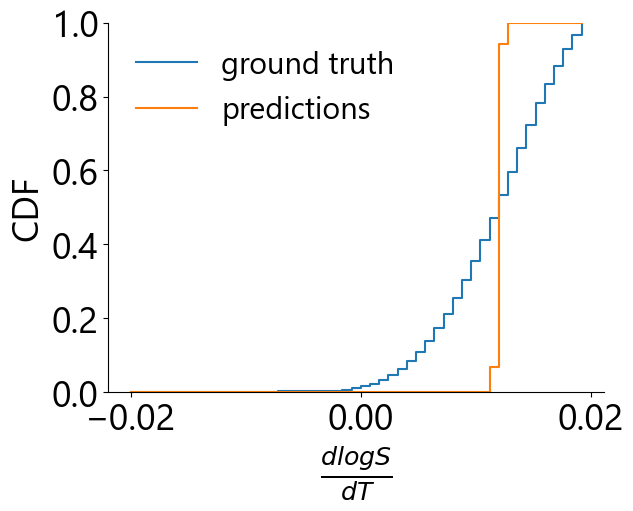

In [194]:
import numpy as np
import matplotlib.pyplot as plt

# Compute histograms
true_grads_binned, true_grad_bins = np.histogram(true_grads, bins=50, range = (-0.02, 0.02))
pred_grads_binned, pred_grad_bins = np.histogram(pred_grads, bins=50, range = (-0.02, 0.02)
)

# Compute the CDF
true_grads_cdf = np.cumsum(true_grads_binned) / np.sum(true_grads_binned)
pred_grads_cdf = np.cumsum(pred_grads_binned) / np.sum(pred_grads_binned)

# Create the plot
plt.figure(figsize=[6.4, 4.8])
ax1 = plt.gca()

# Plot the CDFs as step plots
ax1.step(true_grad_bins[:-1], true_grads_cdf, where='post', label='ground truth')
ax1.step(pred_grad_bins[:-1], pred_grads_cdf, where='post', label='predictions')

# Set axis limits
ax1.set_ylim([0, 1])
ax1.set_ylabel("CDF")
ax1.set_xlabel(r"$\frac{dlogS}{dT}$")
ax1.legend(prop={'size': 22}, loc='upper left', frameon=False)
ax1.spines[['right', 'top']].set_visible(False)

# Show the plot
plt.show()
